Import Library

# **Prediksi Tingkat Stress Siswa Berdasarkan Gaya Hidupnya**
---

### **Kelompok 05 - Pembelajaran Mesin B**

1. Dzu Sunan Muhammad - 24060122120034
2. Dhela Realine - 24060122130078
3. Tera Makna Pratiwi - 24060122140102
5. Adzkiya Qarina Salsabila - 24060122140138

### **Introduction**

Pada unsupervised learning ini akan dilakukan clustering dengan menggunakan algoritma K-Means Clustering. Dataset yang digunakan student lifestyle dataset,clustering dilakukan dari data siswa berdasarkan durasi belajar, durasi ekstarkurikuler, durasi tidur, durasi bersosial, durasi kegiatan fisik, dan nilai.

Detail dataset:
*   Student_ID: Kode unik untuk data mahasiswa
*   Study_Hours_Per_Day: Durasi belajar siswa per hari
*   Extracurricular_Hours_Per_Day: Durasi esktrakurikuler siswa per hari
*   Sleep_Hours_Per_Day:  Durasi tidur siswa per hari
*   Social_Hours_Per_Day: Durasi bersosial siswa per hari
*   Physical_Activity_Hours_Per_Day: Durasi aktifitas fisik siswa
*   Stress_Level: Tingkat stress siswa (Low, Moderate, High)

Tujuan dari clustering siswa berdasarkan gaya hidupnya adalah untuk mengidentifikasi pola atau kelompok siswa yang memiliki karakteristik gaya hidup serupa. Dengan pendekatan ini, diharapkan dapat ditemukan hubungan antara faktor-faktor, dengan tingkat stres yang dialami siswa. Clustering ini memungkinkan penanganan yang lebih tepat dan sesuai dengan kebutuhan masing-masing kelompok, seperti program pengelolaan stres yang disesuaikan dengan gaya hidup spesifik mereka, serta memberikan wawasan yang lebih dalam mengenai faktor-faktor yang mempengaruhi mental siswa.

### **Import Library**

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from random import sample
from numpy.random import uniform
from scipy.spatial.distance import cdist
from math import isnan
from scipy.stats import boxcox
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### **1. Load and Explore the Data**

Load Dataset

In [134]:
data = pd.read_csv('student_lifestyle_dataset.csv')
data.shape

(2000, 8)

Overall Structure

In [135]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


Data Types

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


Check for Missing Values

In [137]:
data.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [138]:
data.duplicated().sum()

0

### **2. Descriptive Statistics and Visualizations**

Statistics Summary

In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


Histplot

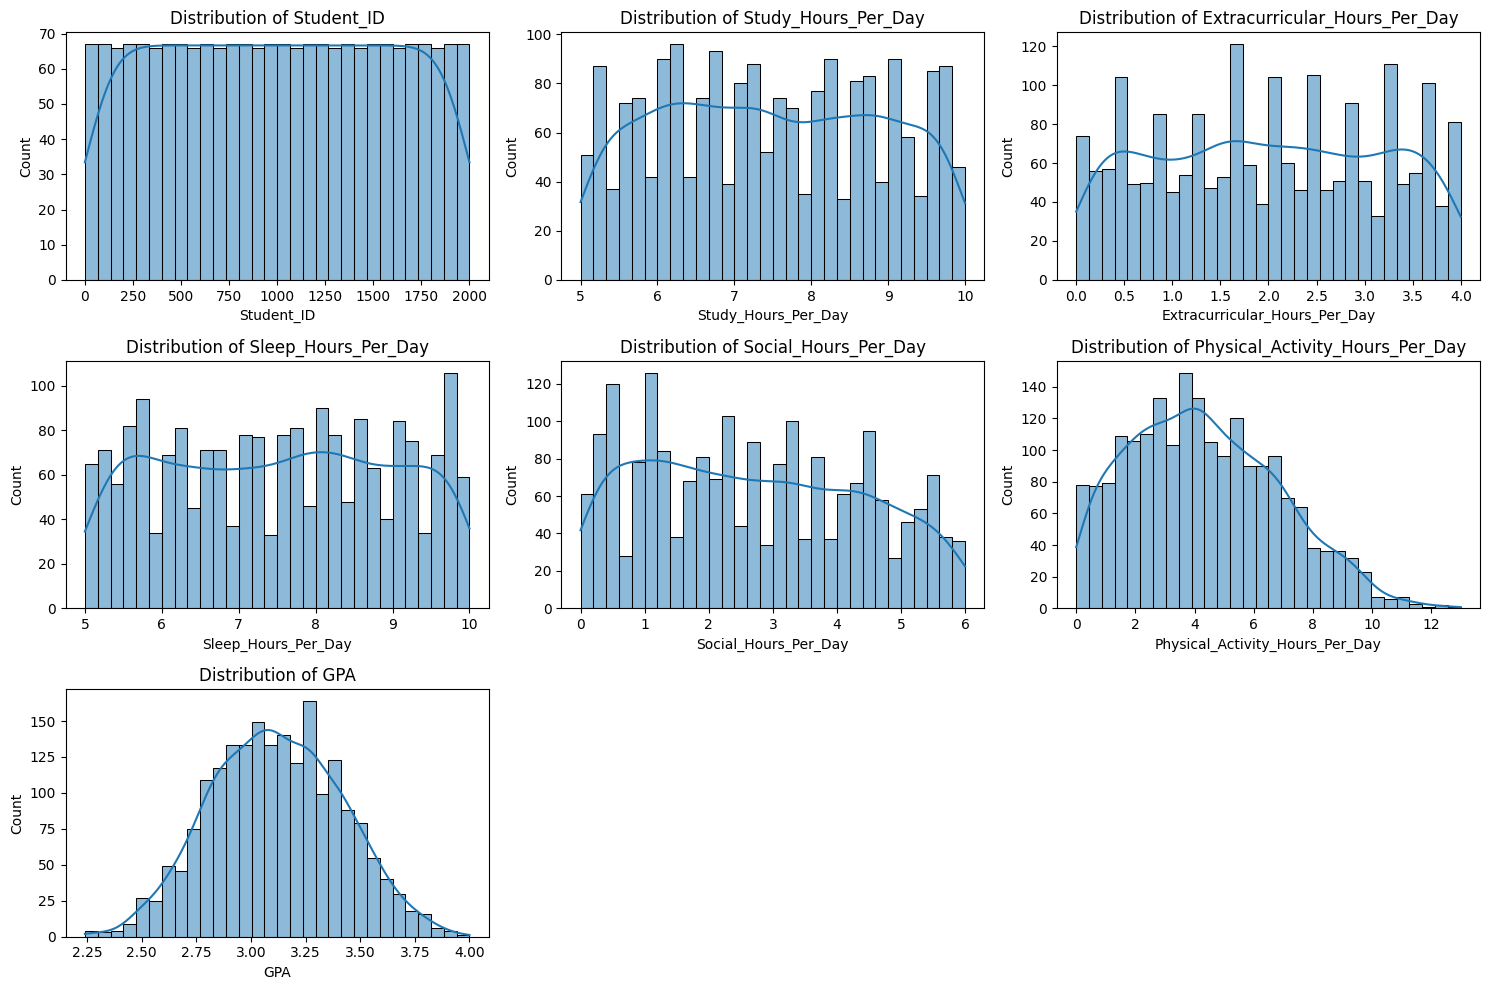

In [140]:
numeric_columns = data.select_dtypes(include=np.number).columns

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [141]:
# List untuk nama kolom dan nilai skewness
columns_list = []
skewness_list = []

# Iterasi untuk setiap kolom numerik dan hitung skewness
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    columns_list.append(column)  # Menambahkan nama kolom
    skewness_list.append(data[column].skew())  # Menambahkan nilai skewness

# Membuat DataFrame dari list
data_skew_kurt = pd.DataFrame({
    'columns': columns_list,
    'skewness': skewness_list
})

# Menampilkan DataFrame dengan skewness untuk setiap kolom
data_skew_kurt

,columns,skewness
0,Student_ID,0.000000
1,Study_Hours_Per_Day,0.034988
2,Extracurricular_Hours_Per_Day,0.001263
3,Sleep_Hours_Per_Day,-0.007096
4,Social_Hours_Per_Day,0.184222
5,Physical_Activity_Hours_Per_Day,0.399239
6,GPA,0.027516


Boxplot

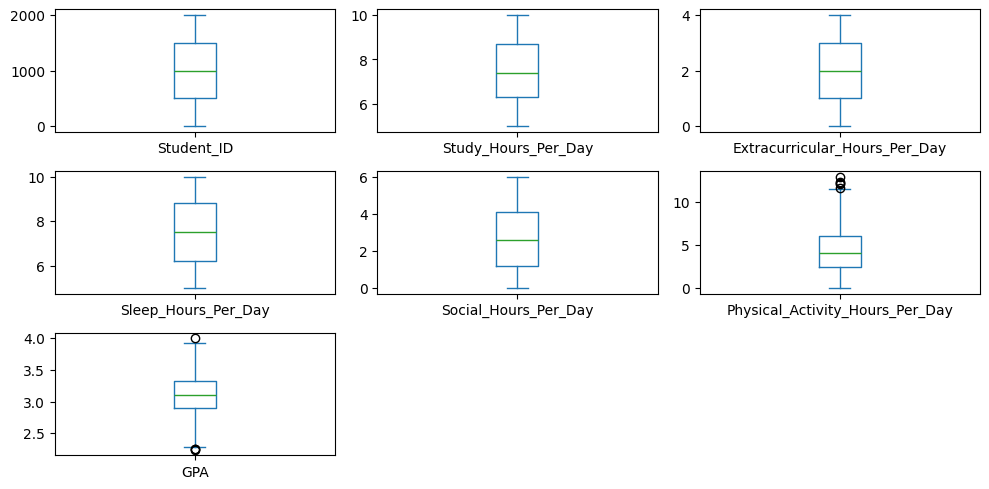

In [142]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [143]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3

outliers = np.where(z_scores > threshold)
outlier_rows = data.iloc[outliers[0]]
outlier_rows

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
62,63,5.1,0.5,5.2,0.2,13.0,2.85,High
171,172,5.1,0.3,6.0,0.2,12.4,2.70,Low
784,785,5.1,0.3,6.3,0.2,12.1,2.55,Low
1174,1175,5.3,0.3,5.9,0.2,12.3,2.97,High


### **3. Correlation and Redundancy Check**

Correlation Matrix

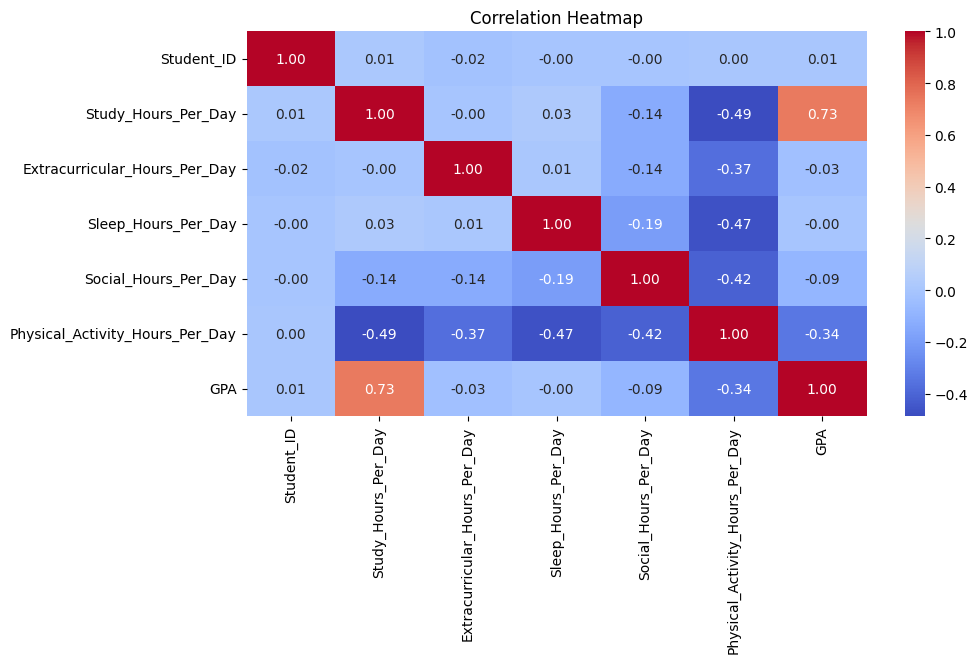

In [144]:
data_numeric = data.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **4. Hasil Eksplorasi Data**

1. Dataset terdiri dari 2000 data dan 8 fitur.
2. Terdapat satu fitur dengan data kategorikal yang merupakan label, yaitu Stress_Level.
3. Tidak terdapat missing values ataupun duplicate values.
4. Distribusi data dari Student_ID adalah uniform karena merupakan identifier.
5. Distribusi data dari Study_Hours_Per_Day adalah normal dengan rentang 5 - 10.
6. Distribusi data dari Extracurricular_Hours_Per_Day adalah normal dengan rentang 0 - 4.
7. Distribusi data dari Sleep_Hours_Per_Day adalah normal dengan rentang 5 - 10.
8. Distribusi data dari Social_Hours_Per_Day adalah normal dengan retang 0 - 6
9. Distribusi data dari Physical_Activity_Hours_Per_Day adalah normal dengan rentang 0 - 15.
10. Distribusi data dari GPA adalah normal dengan rentang 2.25 - 4.00.
11. Terdapat data outlier pada fitur Physical_Activity_Hours_Per_Day dan GPA dengan jumlah data outlier adalah 4.
12. Fitur GPA dengan Study_Hours_Per_Day memiliki korelasi positif kuat.
13. Fitur GPA dengan Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, dan Social_Hours_Per_Day memiliki tingkat korelasi negatif lemah.
14. Fitur GPA dengan Physical_Activity_Per_Day memiliki korelasi negatif sedang.
15. Fitur Physical_Activity_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, dan Social_Hours_Per_Day memiliki tingkat korelasi negatif sedang.
16. Fitur Social_Hours_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day memiliki tingkat korelasi negatif lemah.
17. Fitur Sleep_Hours_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day memiliki tingkat korelasi positif lemah.
18. Fitur Extracurricular_Hours_Per_Day dengan Study_Hours_Per_Day memiliki tingkat korelasi lemah.

### **5. Preprocessing Data**

Menghapus Fitur Tidak Relevan

In [145]:
cleaned_data = data.drop(columns=['Student_ID', 'Stress_Level'], axis=1).dropna()

Normalisasi Data

In [147]:
columns = cleaned_data.columns
scaler = MinMaxScaler()
cleaned_data[columns] = scaler.fit_transform(cleaned_data[columns])

Membersihkan Outlier

In [149]:
def winsorize_column(df, column, lower_percentile=1, upper_percentile=90):
    lower_limit = df[column].quantile(lower_percentile / 100)
    upper_limit = df[column].quantile(upper_percentile / 100)
    median_value = df[column].median()

    # Replace values below the lower limit with the median
    df[column] = df[column].apply(lambda x: median_value if x < lower_limit else x)

    # Replace values above the upper limit with the median
    df[column] = df[column].apply(lambda x: median_value if x > upper_limit else x)

    return df

columns = ['Physical_Activity_Hours_Per_Day', 'GPA']
for column in columns:
    cleaned_data = winsorize_column(cleaned_data, column)

In [150]:
cleaned_data.shape

(2000, 6)

In [151]:
cleaned_data.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,0.38,0.950,0.74,0.466667,0.138462,0.426136
1,0.06,0.875,0.60,0.700000,0.230769,0.289773
2,0.02,0.975,0.84,0.200000,0.353846,0.244318
3,0.30,0.525,0.44,0.283333,0.500000,0.363636
4,0.62,0.150,0.30,0.366667,0.507692,0.721591


In [154]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,0.495160,0.284778,0.000000,0.260000,0.480000,0.740000,1.000000
Extracurricular_Hours_Per_Day,2000.0,0.497525,0.288964,0.000000,0.250000,0.500000,0.750000,1.000000
Sleep_Hours_Per_Day,2000.0,0.500250,0.292190,0.000000,0.240000,0.500000,0.760000,1.000000
Social_Hours_Per_Day,2000.0,0.450758,0.281419,0.000000,0.200000,0.433333,0.683333,1.000000
Physical_Activity_Hours_Per_Day,2000.0,0.298654,0.147813,0.015385,0.184615,0.315385,0.400000,0.600000
GPA,2000.0,0.473307,0.133005,0.136364,0.380682,0.494318,0.573864,0.721591


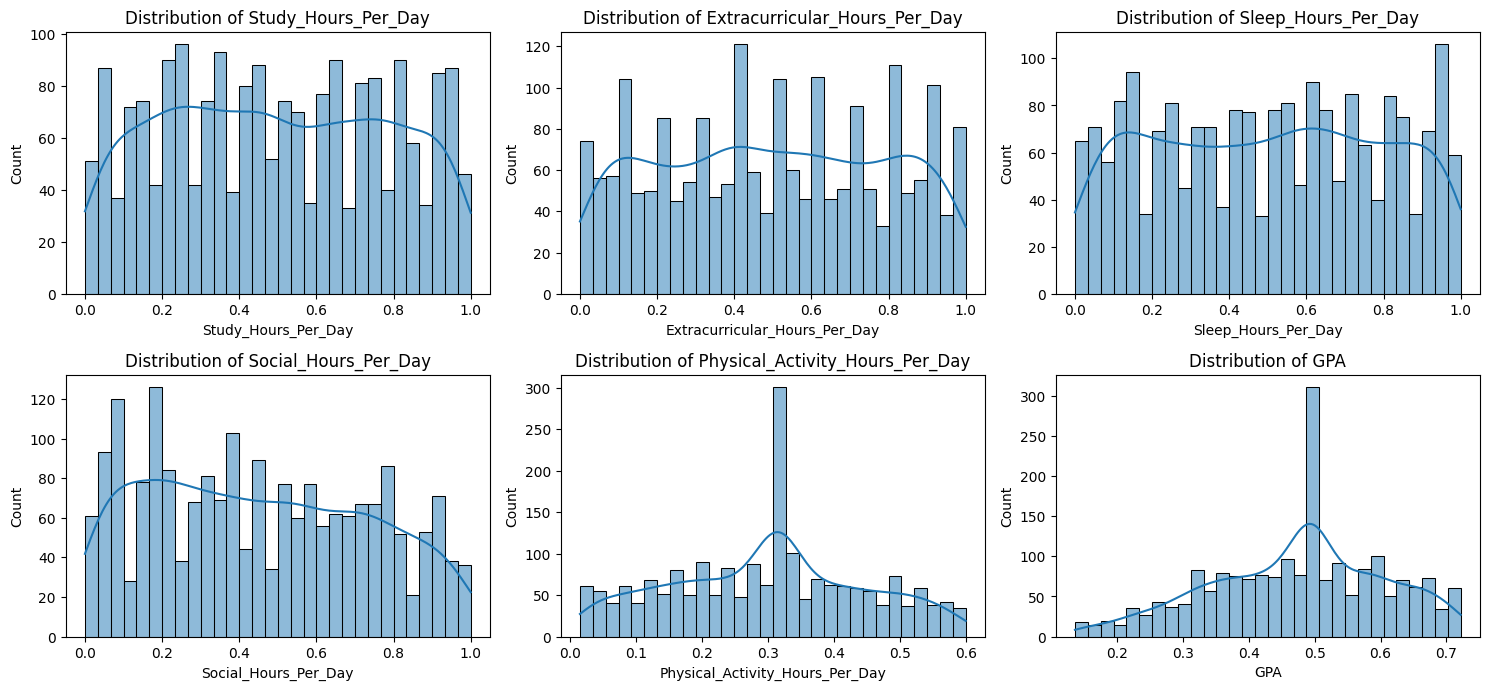

In [155]:
columns = cleaned_data.columns

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(cleaned_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Atur tata letak
plt.tight_layout()
plt.show()

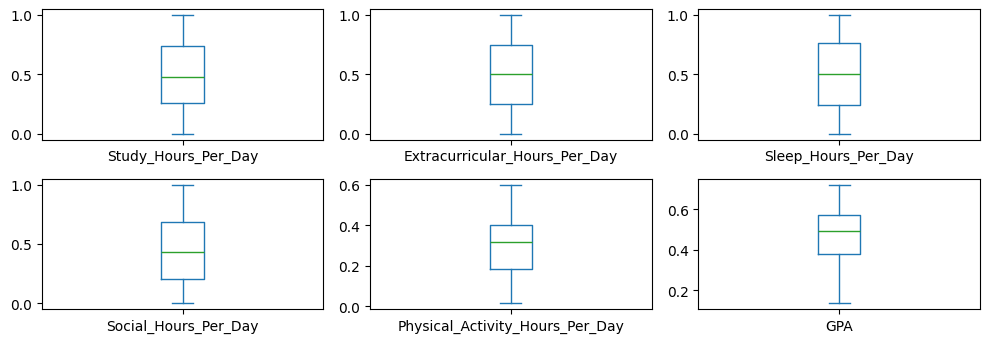

In [156]:
cleaned_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### **6. Dimensionality Reduction**

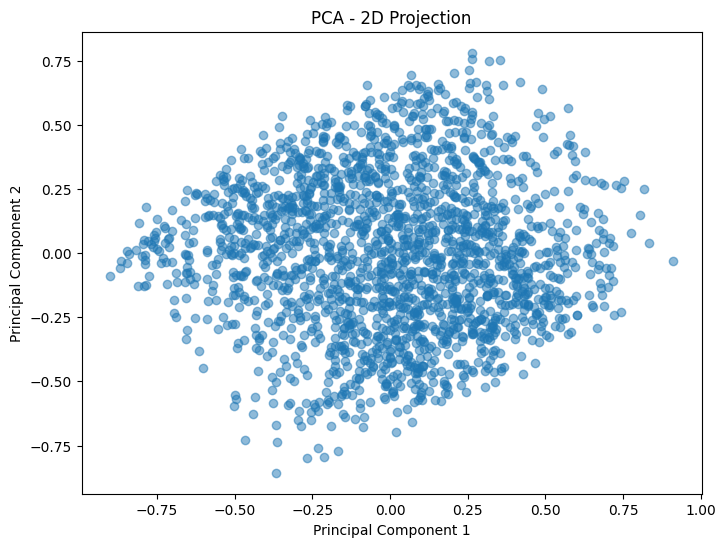

In [157]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cleaned_data)
pca_data = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### **7. Cluster Tendency Test**

In [158]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins_stat = hopkins(pca_data)
print(f"Hopkins Statistic: {hopkins_stat}")

Hopkins Statistic: 0.8854233036408033


### **8. Applying Clustering Algorithm (K-Means)**

Elbow Method

Text(0.5, 1.0, 'Elbow Method')

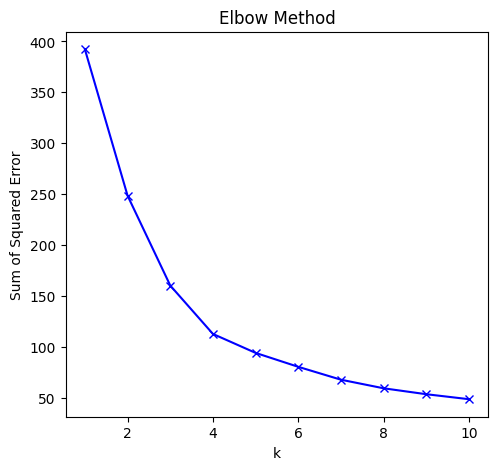

In [159]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')

Silhouette Score

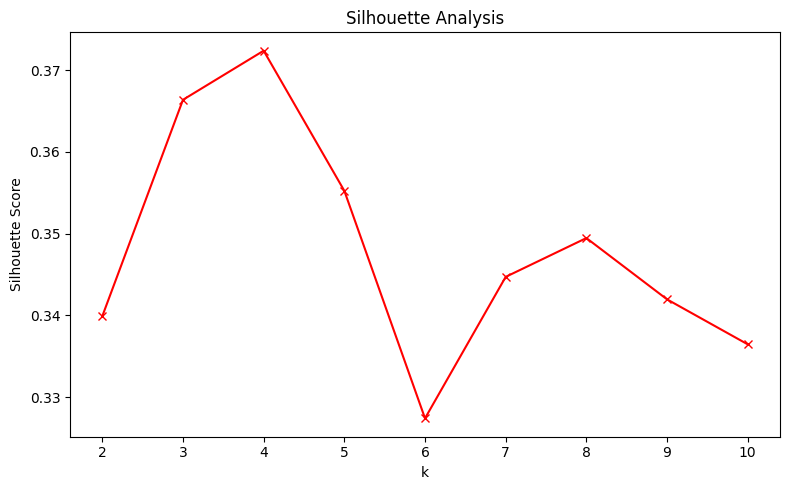

In [160]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

### **9. Final Cluster Visualization**

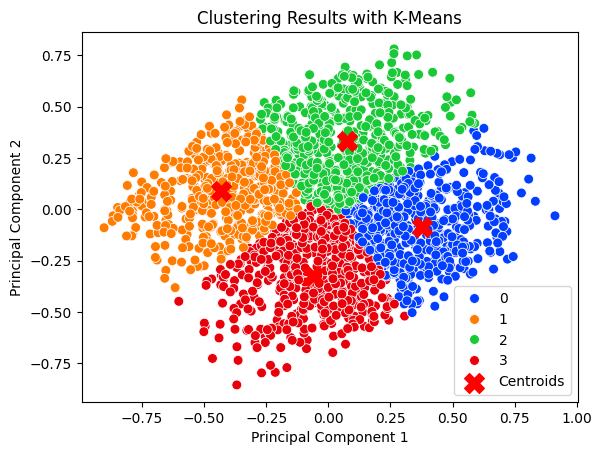

           PC1       PC2  Cluster
0    -0.241434 -0.347173        3
1     0.178931 -0.515841        3
2    -0.213573 -0.794647        3
3     0.075962 -0.228378        3
4     0.121924  0.334379        2
...        ...       ...      ...
1995  0.235554  0.029966        0
1996 -0.163531 -0.461807        3
1997  0.260193  0.033249        0
1998  0.117212  0.246126        2
1999 -0.081203  0.305617        2

[2000 rows x 3 columns]


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data[['PC1', 'PC2']])

pca_data['Cluster'] = kmeans.labels_

palette = sns.color_palette('bright', 4)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=palette, data=pca_data, s=50)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Clustering Results with K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
print(pca_data)


In [164]:
cluster_counts = pca_data['Cluster'].value_counts()
print("Data points per cluster:")
print(cluster_counts)

Data points per cluster:
Cluster
2    522
3    520
0    506
1    452
Name: count, dtype: int64


In [165]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(len(centroids))
print("\nCluster centroids (in PCA space):")
print(centroids)


Cluster centroids (in PCA space):
        PC1       PC2  Cluster
0  0.375570 -0.084712        0
1 -0.432078  0.087596        1
2  0.073474  0.330035        2
3 -0.063640 -0.325014        3



Cluster 0:
Number of data points: 506
              PC1         PC2  Cluster
count  506.000000  506.000000    506.0
mean     0.375570   -0.084712      0.0
std      0.160082    0.164455      0.0
min      0.070539   -0.503681      0.0
25%      0.254631   -0.201747      0.0
50%      0.348667   -0.082677      0.0
75%      0.479042    0.027248      0.0
max      0.911617    0.393983      0.0

Cluster 1:
Number of data points: 452
              PC1         PC2  Cluster
count  452.000000  452.000000    452.0
mean    -0.432078    0.087596      1.0
std      0.169730    0.164302      0.0
min     -0.902039   -0.382047      1.0
25%     -0.536356   -0.026462      1.0
50%     -0.406449    0.090327      1.0
75%     -0.296505    0.206188      1.0
max     -0.122762    0.532463      1.0

Cluster 2:
Number of data points: 522
              PC1         PC2  Cluster
count  522.000000  522.000000    522.0
mean     0.073474    0.330035      2.0
std      0.176097    0.172462      0.0
min     -0.272848   -0.00

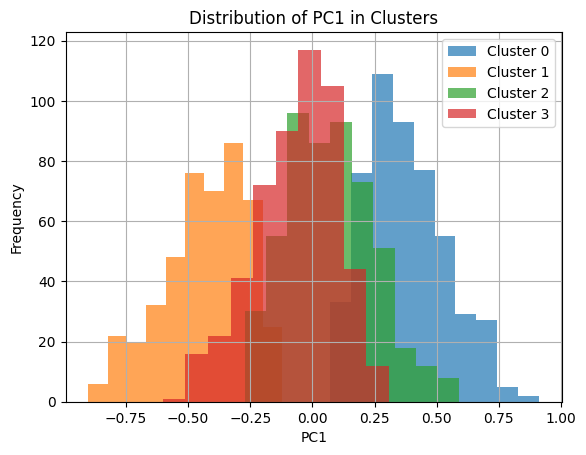

In [166]:
for cluster in sorted(pca_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    print(f"Number of data points: {len(cluster_data)}")
    print(cluster_data.describe())

    cluster_data['PC1'].hist(alpha=0.7, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Distribution of PC1 in Clusters')
plt.show()


Cluster 0:
Number of data points: 506
              PC1         PC2  Cluster
count  506.000000  506.000000    506.0
mean     0.375570   -0.084712      0.0
std      0.160082    0.164455      0.0
min      0.070539   -0.503681      0.0
25%      0.254631   -0.201747      0.0
50%      0.348667   -0.082677      0.0
75%      0.479042    0.027248      0.0
max      0.911617    0.393983      0.0

Cluster 1:
Number of data points: 452
              PC1         PC2  Cluster
count  452.000000  452.000000    452.0
mean    -0.432078    0.087596      1.0
std      0.169730    0.164302      0.0
min     -0.902039   -0.382047      1.0
25%     -0.536356   -0.026462      1.0
50%     -0.406449    0.090327      1.0
75%     -0.296505    0.206188      1.0
max     -0.122762    0.532463      1.0

Cluster 2:
Number of data points: 522
              PC1         PC2  Cluster
count  522.000000  522.000000    522.0
mean     0.073474    0.330035      2.0
std      0.176097    0.172462      0.0
min     -0.272848   -0.00

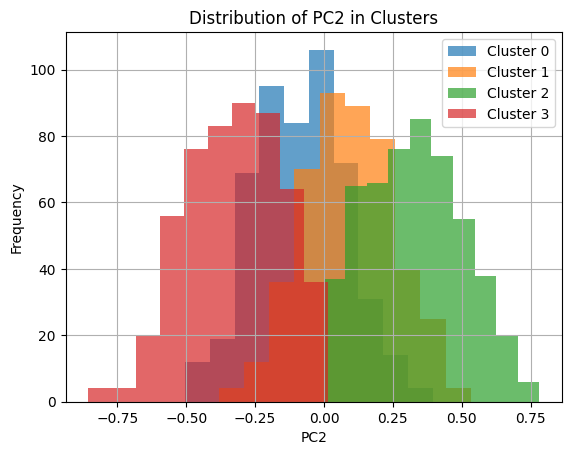

In [167]:
for cluster in sorted(pca_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    print(f"Number of data points: {len(cluster_data)}")
    print(cluster_data.describe())

    cluster_data['PC2'].hist(alpha=0.7, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC2')
plt.ylabel('Frequency')
plt.title('Distribution of PC2 in Clusters')
plt.show()

In [168]:
distances = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_)
print("\nInter-cluster distances:")
print(pd.DataFrame(distances, columns=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))],
                   index=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))]))


Inter-cluster distances:
           Cluster 0  Cluster 1  Cluster 2  Cluster 3
Cluster 0   0.000000   0.825824   0.513105   0.500651
Cluster 1   0.825824   0.000000   0.560678   0.553166
Cluster 2   0.513105   0.560678   0.000000   0.669246
Cluster 3   0.500651   0.553166   0.669246   0.000000


### **10. Evaluasi Model**

In [170]:
pca_data.groupby(['PC1',  'PC2']).size().reset_index().rename(columns={0:'count'})

,PC1,PC2,count
0,-0.902039,-0.090323,1
1,-0.868872,-0.059125,1
2,-0.865681,-0.031974,1
3,-0.847365,0.008136,1
4,-0.846101,-0.039494,1
...,...,...,...
1995,0.776581,0.079002,1
1996,0.805816,0.146614,1
1997,0.815653,0.248929,1
1998,0.832570,0.038746,1


In [171]:
pca_data['Cluster'].unique()

array([3, 2, 0, 1], dtype=int32)

In [172]:
with open('kmeans_pipeline.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'pca': pca,
        'kmeans': kmeans
    }, f)
print("Model dan preprocessing telah disimpan.")

Model dan preprocessing telah disimpan.


In [173]:
with open('kmeans_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

scaler = pipeline['scaler']
pca = pipeline['pca']
kmeans = pipeline['kmeans']

data_baru = pd.DataFrame([{
    'Study_Hours_Per_Day': 6.5,
    'Extracurricular_Hours_Per_Day': 2.1,
    'Sleep_Hours_Per_Day': 7.2,
    'Social_Hours_Per_Day': 1.7,
    'Physical_Activity_Hours_Per_Day': 6.5,
    'GPA': 2.88
}])

data_baru_scaled = scaler.transform(data_baru)

data_baru_pca = pca.transform(data_baru_scaled)

cluster_pred = kmeans.predict(data_baru_pca)
print(f"Data baru termasuk ke dalam cluster: {cluster_pred[0]}")


Data baru termasuk ke dalam cluster: 3


Jarak data baru ke setiap centroid: [0.33227266 0.59828451 0.55841903 0.16978621]


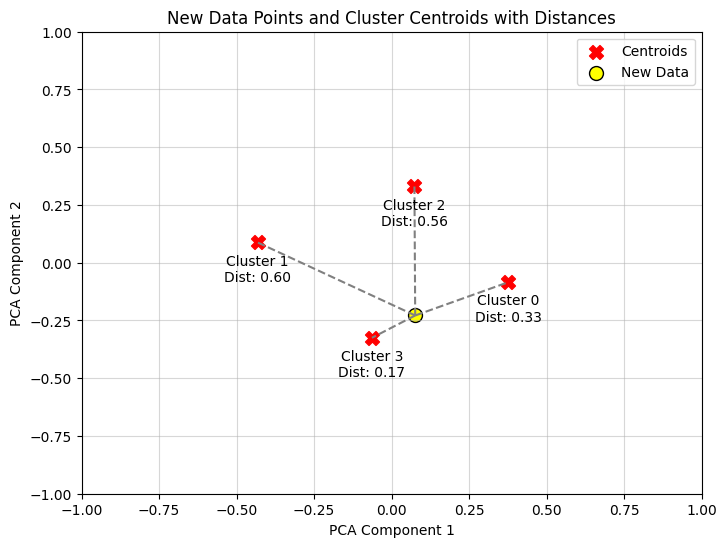

In [174]:
distances = np.linalg.norm(kmeans.cluster_centers_ - data_baru_pca, axis=1)

print(f"Jarak data baru ke setiap centroid: {distances}")

plt.figure(figsize=(8, 6))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', label='Centroids', s=100, marker='X')

for i, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.text(x, y - 0.05, f'Cluster {i}\nDist: {distances[i]:.2f}',
             color='black', fontsize=10, ha='center', va='top')

plt.scatter(data_baru_pca[:, 0], data_baru_pca[:, 1],
            color='yellow', label='New Data', s=100, edgecolor='black')

for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.plot([data_baru_pca[0, 0], centroid[0]],
             [data_baru_pca[0, 1], centroid[1]],
             linestyle='--', color='gray')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.25, 0.25))
plt.yticks(np.arange(-1, 1.25, 0.25))

plt.title("New Data Points and Cluster Centroids with Distances")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.5)
plt.show()